# Import the required libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,plot_tree
import sklearn.tree as tree

# Load Data From CSV File

In [2]:
df=pd.read_csv("C:\\Users\\ROG\\Desktop\\ML_workShop_dataSets\\credit_risk.csv")

In [3]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
data=df.reindex(columns=["Id","Age","Income","Home","Emp_length","Intent","Amount","Rate","Percent_income","Default","Cred_length","Status"])
data.head(110)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,Y,3,1
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,N,2,0
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,N,3,1
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,N,2,1
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,22,12600,MORTGAGE,NaN,PERSONAL,2000,5.42,0.16,N,4,1
106,106,25,12600,OWN,3.0,PERSONAL,1750,13.61,0.14,N,3,0
107,107,21,42500,RENT,3.0,EDUCATION,25000,12.73,0.59,Y,3,1
108,108,24,41000,RENT,2.0,HOMEIMPROVEMENT,25000,NaN,0.61,N,3,1


# Data Visualization and Analysis

In [5]:
data[["Status"]].value_counts()

Status
0         25473
1          7108
dtype: int64

In [6]:
data.columns

Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Percent_income', 'Default', 'Cred_length', 'Status'],
      dtype='object')

Handling Missing Data

In [7]:
missing_data = data.isnull()
missing_data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Id
False    32581
Name: Id, dtype: int64

Age
False    32581
Name: Age, dtype: int64

Income
False    32581
Name: Income, dtype: int64

Home
False    32581
Name: Home, dtype: int64

Emp_length
False    31686
True       895
Name: Emp_length, dtype: int64

Intent
False    32581
Name: Intent, dtype: int64

Amount
False    32581
Name: Amount, dtype: int64

Rate
False    29465
True      3116
Name: Rate, dtype: int64

Percent_income
False    32581
Name: Percent_income, dtype: int64

Default
False    32581
Name: Default, dtype: int64

Cred_length
False    32581
Name: Cred_length, dtype: int64

Status
False    32581
Name: Status, dtype: int64



In [9]:
missing_values_count = data.isnull().sum()
missing_values_count

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Percent_income       0
Default              0
Cred_length          0
Status               0
dtype: int64

In [10]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells) * 100
percent_missing

1.025904668364998

In [11]:
avg_rate = data["Rate"].astype("float").mean(axis=0)
print("Average of Rate:", avg_rate)

Average of Rate: 11.011694892245036


In [12]:
data["Rate"].replace(np.nan, avg_rate, inplace=True)

In [13]:
avg_emp_length = data["Emp_length"].astype("float").mean(axis=0)
print("Average of Emp_length:", avg_emp_length)

Average of Emp_length: 4.789686296787225


In [14]:
data["Emp_length"].replace(np.nan, avg_emp_length, inplace=True)

In [15]:
data.head(110)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,Y,3,1
1,1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,N,2,0
2,2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,N,3,1
3,3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,N,2,1
4,4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,N,4,1
106,106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,N,3,0
107,107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,Y,3,1
108,108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,N,3,1


In [16]:
missing_values_count = data.isnull().sum()
missing_values_count

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Percent_income    0
Default           0
Cred_length       0
Status            0
dtype: int64

In [17]:
data.drop(columns=['Id'], inplace=True)

In [18]:
data.head(110)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length,Status
0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,Y,3,1
1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,N,2,0
2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,N,3,1
3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,N,2,1
4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...
105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,N,4,1
106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,N,3,0
107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,Y,3,1
108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,N,3,1


In [19]:
data.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Percent_income    float64
Default            object
Cred_length         int64
Status              int64
dtype: object

In [20]:
data.describe()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Status
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211,0.218164
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.106782,4.055001,0.413006
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.150000,4.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.230000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [21]:
data.value_counts("Status")

Status
0    25473
1     7108
dtype: int64

One Hot Encoding

In [22]:
df_dumm=pd.get_dummies(data[["Default"]])
df_dumm.head()

,Default_N,Default_Y
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
data=pd.concat([data,df_dumm],axis=1)

In [24]:
data.drop(columns=['Default_N','Default'], inplace=True)

In [25]:
data.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Cred_length,Status,Default_Y
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,3,1,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,2,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,3,1,0
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,2,1,0
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,4,1,1


In [26]:
data.dtypes

Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Percent_income    float64
Cred_length         int64
Status              int64
Default_Y           uint8
dtype: object

In [27]:
data_1=data.reindex(columns=["Age","Income","Home","Emp_length","Intent","Amount","Rate","Percent_income","Default_Y","Cred_length","Status"])

In [28]:
data_1.head(110)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.000000,PERSONAL,35000,16.020000,0.59,1,3,1
1,21,9600,OWN,5.000000,EDUCATION,1000,11.140000,0.10,0,2,0
2,25,9600,MORTGAGE,1.000000,MEDICAL,5500,12.870000,0.57,0,3,1
3,23,65500,RENT,4.000000,MEDICAL,35000,15.230000,0.53,0,2,1
4,24,54400,RENT,8.000000,MEDICAL,35000,14.270000,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
105,22,12600,MORTGAGE,4.789686,PERSONAL,2000,5.420000,0.16,0,4,1
106,25,12600,OWN,3.000000,PERSONAL,1750,13.610000,0.14,0,3,0
107,21,42500,RENT,3.000000,EDUCATION,25000,12.730000,0.59,1,3,1
108,24,41000,RENT,2.000000,HOMEIMPROVEMENT,25000,11.011695,0.61,0,3,1


In [29]:
data_1.round(2)

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,1,3,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,0,3,1
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,0,2,1
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0.11,0,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0.15,0,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,0.46,0,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0.10,0,26,0


In [30]:
data_1.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,0.59,1,3,1
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0.10,0,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,0.57,0,3,1
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,0.53,0,2,1
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,0.55,1,4,1


<Axes: xlabel='Home', ylabel='Status'>

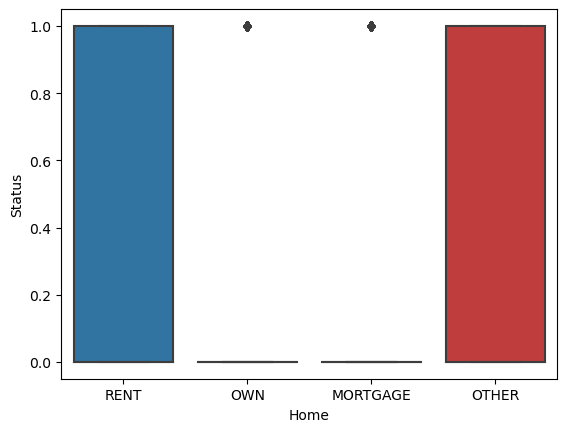

In [31]:
sns.boxplot(x="Home", y="Status", data=data)

<Axes: xlabel='Intent', ylabel='Status'>

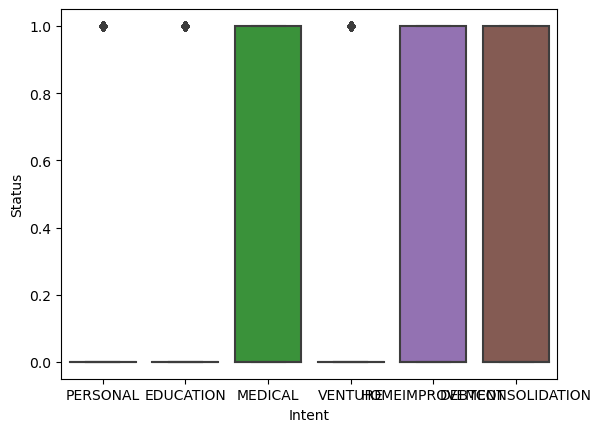

In [32]:
sns.boxplot(x="Intent", y="Status", data=data)

In [33]:
label_encoder_home = LabelEncoder()
label_encoder_intent = LabelEncoder()

# Encode the "Home" feature
label_encoder_home.fit(data_1["Home"])
data_1["Home_en"] = label_encoder_home.transform(data_1["Home"])
data_1.drop("Home", axis=1, inplace=True)

# Encode the "Intent" feature
label_encoder_intent.fit(data_1["Intent"])
data_1["Intent_en"] = label_encoder_intent.transform(data_1["Intent"])
data_1.drop("Intent", axis=1, inplace=True)

In [34]:
data_1.head()

,Age,Income,Emp_length,Amount,Rate,Percent_income,Default_Y,Cred_length,Status,Home_en,Intent_en
0,22,59000,123.0,35000,16.02,0.59,1,3,1,3,4
1,21,9600,5.0,1000,11.14,0.10,0,2,0,2,1
2,25,9600,1.0,5500,12.87,0.57,0,3,1,0,3
3,23,65500,4.0,35000,15.23,0.53,0,2,1,3,3
4,24,54400,8.0,35000,14.27,0.55,1,4,1,3,3


In [35]:
data_12=data_1.reindex(columns=["Age","Income","Home_en","Emp_length","Intent_en","Amount","Rate","Percent_income","Default_Y","Cred_length","Status"])

In [36]:
data_12.round(2)

,Age,Income,Home_en,Emp_length,Intent_en,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,3,123.0,4,35000,16.02,0.59,1,3,1
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2,0
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3,1
3,23,65500,3,4.0,3,35000,15.23,0.53,0,2,1
4,24,54400,3,8.0,3,35000,14.27,0.55,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,5800,13.16,0.11,0,30,0
32577,54,120000,0,4.0,4,17625,7.49,0.15,0,19,0
32578,65,76000,3,3.0,2,35000,10.99,0.46,0,28,1
32579,56,150000,0,5.0,4,15000,11.48,0.10,0,26,0


In [37]:
data_12.head()

,Age,Income,Home_en,Emp_length,Intent_en,Amount,Rate,Percent_income,Default_Y,Cred_length,Status
0,22,59000,3,123.0,4,35000,16.02,0.59,1,3,1
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2,0
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3,1
3,23,65500,3,4.0,3,35000,15.23,0.53,0,2,1
4,24,54400,3,8.0,3,35000,14.27,0.55,1,4,1


Imbalance Data Handling

In [38]:
data_12.value_counts("Status")

Status
0    25473
1     7108
dtype: int64

In [39]:
x=data_12.iloc[:,:10]
y=data_12.iloc[:,10]

In [40]:
smt=SMOTE()

In [41]:
x_sm,y_sm=smt.fit_resample(x,y)

In [42]:
y_sm.value_counts()

1    25473
0    25473
Name: Status, dtype: int64

In [43]:
x_sm.shape

(50946, 10)

In [44]:
y_sm.shape

(50946,)

In [45]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd

# # Assuming data_12 is your original DataFrame
# x = data_12.iloc[:, :10]
# y = data_12.iloc[:, 10]

# # Apply SMOTE to balance the data
# smt = SMOTE()
# x_sm, y_sm = smt.fit_resample(x, y)

# # Convert the newly generated data to a DataFrame
# new_data = pd.DataFrame(x_sm, columns=x.columns)
# new_data["target_variable"] = y_sm

# # Concatenate the new data with the original DataFrame
# data_12_balanced = pd.concat([data_12, new_data], ignore_index=True)

# # Now data_12_balanced contains the original data plus the newly generated data


In [46]:
X=x_sm.values
y=y_sm.values

Train Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [48]:
X_features=["Age","Income","Home_en","Emp_length","Intent_en","Amount","Rate","Percent_income","Default_Y","Cred_length"]

Normalize Data

In [49]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))

In [50]:
X_train_norm[0:5]

array([[ 0.59689159,  0.33044438,  0.85755282, -0.66749362, -0.80514126,
        -0.00324262, -0.0862181 , -0.55762927,  2.36940633,  0.63367843],
       [-0.9126904 , -0.53179672, -0.60425749, -0.58342555, -0.19348123,
        -0.92859762,  1.85401532, -0.55762927, -0.42204665, -0.93966669],
       [ 0.26142893,  0.34281697, -1.33516265,  0.06646747, -1.41680128,
        -0.30505443, -2.03036658, -0.80375082, -0.42204665, -0.15299413],
       [-0.24176507,  0.41036843, -1.33516265, -0.93059169,  1.02983882,
         1.05309871, -0.4627143 ,  0.01665436, -0.42204665, -0.67744251],
       [-0.4094964 , -0.52340612,  0.85755282, -0.24382981,  0.41817879,
        -0.47648353,  2.55783964,  0.20715717,  2.36940633, -0.41521832]])

# Classification

# K nearest neighbor (KNN)

In [51]:
knncl=KNeighborsClassifier(n_neighbors=6)

In [52]:
knncl.fit(X_train_norm,y_train)

KNeighborsClassifier(n_neighbors=6)

In [53]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 1.27936440e+00,  4.10591094e-01,  8.62443394e-01,
         1.14808612e-01, -7.87633668e-01,  1.96139011e-03,
        -1.33913061e+00, -6.38955463e-01, -4.14978943e-01,
         1.13184971e+00],
       [-7.04024619e-02, -4.92191589e-01,  8.62443394e-01,
        -9.64577983e-01, -1.78080461e-01, -7.54836008e-01,
        -2.57333956e-01, -4.75087913e-01, -4.14978943e-01,
         8.75810359e-01],
       [ 2.67039254e-01, -5.88785126e-01,  1.28862577e-01,
         6.13124698e-02,  1.65057916e+00, -4.52117049e-01,
        -1.50670349e+00,  2.62316064e-01, -4.14978943e-01,
         1.13184971e+00],
       [-2.39123320e-01, -6.92155046e-01,  8.62443394e-01,
        -1.39554949e-01,  4.31472746e-01, -5.27796789e-01,
         7.81310787e-01,  5.08117390e-01,  2.40976082e+00,
        -9.16465086e-01],
       [ 7.73201827e-01,  7.71423489e-01, -6.04718240e-01,
         7.09815801e-02, -7.87633668e-01,  2.27235359e+00,
         1.20419441e+00,  5.08117390e-01, -4.14978943e-01,
         1.

Predicting

In [54]:
yhat = knncl.predict(X_test_norm)
yhat[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

Accuracy evaluation

In [55]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knncl.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8809745804298753
Test set Accuracy:  0.833071638861629


Accuracy of KNN for different values of k.

In [56]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knncl = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=knncl.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84111874, 0.82953876, 0.83405299, 0.83366045, 0.8360157 ,
       0.83307164, 0.8357213 , 0.83326791, 0.83287537])

Plot the model accuracy for a different number of neighbors.

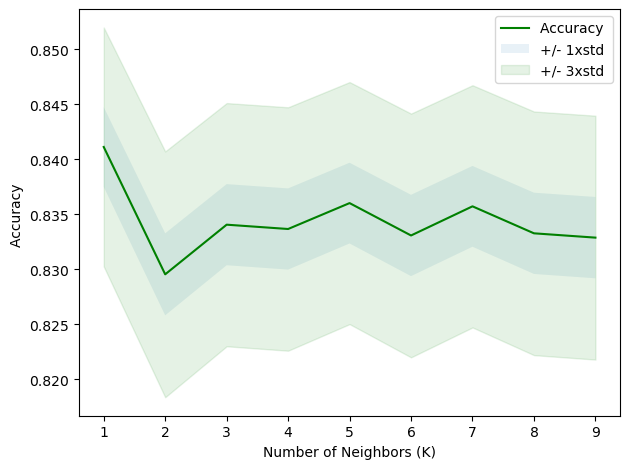

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

When k=7

In [58]:
k = 7
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
yhat7 = neigh7.predict(X_test_norm)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh7.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat7))

Train set Accuracy:  0.8772450682108156
Test set Accuracy:  0.835721295387635


Cross Validation

In [59]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

num_folds = 10

cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(knn_classifier, X_train_norm, y_train, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Results:")
print(cross_val_results)
print("Mean Accuracy: {:.2f}".format(cross_val_results.mean()))

Cross-Validation Results:
[0.83415113 0.84003925 0.82899902 0.83684985 0.83464181 0.81967615
 0.82699387 0.82650307 0.83239264 0.82748466]
Mean Accuracy: 0.83


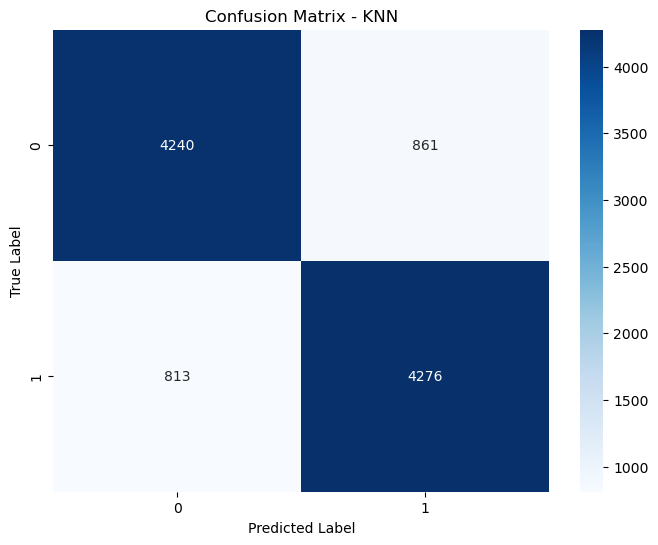

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, yhat7)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()


# Decision Trees

In [60]:
clt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
clt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
# plt.figure(figsize=(20,20))
# plot_tree(clt,feature_names=data_12.columns,class_names=["1","2"],filled=True)
# plt.show()

Prediction

In [62]:
y_pred_tree = clt.predict(X_test)

In [63]:
print (y_pred_tree [0:5])
print (y_test [0:5])

[0 0 0 1 1]
[0 1 0 1 1]


In [64]:
confusion_matrix(y_test,y_pred_tree)

array([[4594,  507],
       [1397, 3692]], dtype=int64)

Evaluation

In [65]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

DecisionTrees's Accuracy:  0.8131501472031404


In [66]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5101
           1       0.88      0.73      0.80      5089

    accuracy                           0.81     10190
   macro avg       0.82      0.81      0.81     10190
weighted avg       0.82      0.81      0.81     10190



Visualization

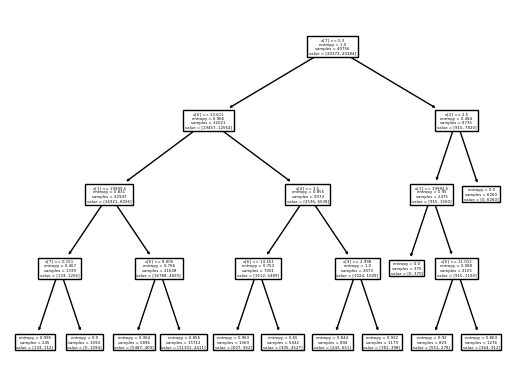

In [67]:
tree.plot_tree(clt)
plt.show()

In [68]:
num_folds = 10

cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(clt, X_train, y_train, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Results:")
print(cross_val_results)
print("Mean Accuracy: {:.2f}".format(cross_val_results.mean()))

Cross-Validation Results:
[0.81501472 0.81256133 0.81084396 0.81722277 0.8110893  0.80642787
 0.80539877 0.8        0.81349693 0.80957055]
Mean Accuracy: 0.81


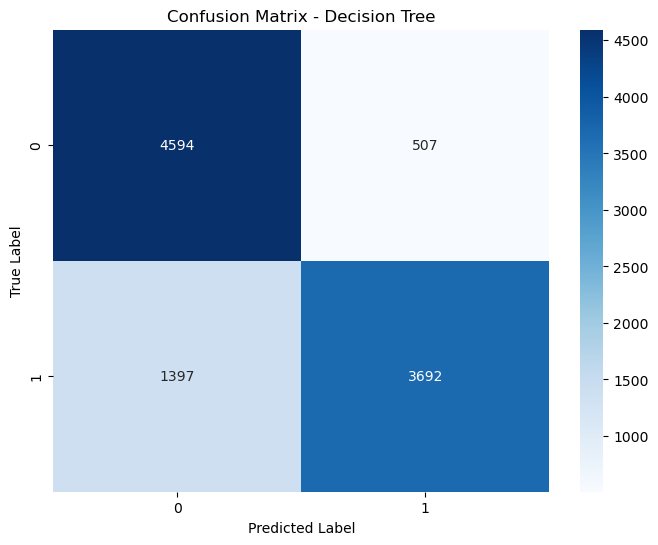

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
